#  Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


# Attribute Information:
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
df.shape

(7752, 25)

# 7752 rows and 25 column present in the dataset

In [4]:
df.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

#  there are missing values present in the dataset

In [5]:
columns=df[['station','Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS',
           'LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']]

for i in columns:
    df[i] = df[i].interpolate()

#  
fill null values all float dtype in perform linear interpolation

except date column, Next_Tmax and Next_Tmin

cause date column is datetime dtpe and we drop this column and also we drop this Next_Tmax and Next_Tmin cuase this are features and it will compromise theire accuracy so we drop this column

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [8]:
df.shape

(7723, 25)

#  Now we have 7723 rows and 25 columns present in the dataset

In [9]:
for i in df.columns:
    print(df[i].value_counts)

<bound method IndexOpsMixin.value_counts of 0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
        ... 
7745    21.0
7746    22.0
7747    23.0
7748    24.0
7749    25.0
Name: station, Length: 7723, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0       30-06-2013
1       30-06-2013
2       30-06-2013
3       30-06-2013
4       30-06-2013
           ...    
7745    30-08-2017
7746    30-08-2017
7747    30-08-2017
7748    30-08-2017
7749    30-08-2017
Name: Date, Length: 7723, dtype: object>
<bound method IndexOpsMixin.value_counts of 0       28.7
1       31.9
2       31.6
3       32.0
4       31.4
        ... 
7745    23.1
7746    22.5
7747    23.3
7748    23.3
7749    23.2
Name: Present_Tmax, Length: 7723, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0       21.4
1       21.6
2       23.3
3       23.4
4       21.9
        ... 
7745    17.8
7746    17.4
7747    17.1
7748    17.7
7749    17.4
Name: Present_Tmin, Length: 7723, dtype: float64>


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7723 non-null   float64
 1   Date              7723 non-null   object 
 2   Present_Tmax      7723 non-null   float64
 3   Present_Tmin      7723 non-null   float64
 4   LDAPS_RHmin       7723 non-null   float64
 5   LDAPS_RHmax       7723 non-null   float64
 6   LDAPS_Tmax_lapse  7723 non-null   float64
 7   LDAPS_Tmin_lapse  7723 non-null   float64
 8   LDAPS_WS          7723 non-null   float64
 9   LDAPS_LH          7723 non-null   float64
 10  LDAPS_CC1         7723 non-null   float64
 11  LDAPS_CC2         7723 non-null   float64
 12  LDAPS_CC3         7723 non-null   float64
 13  LDAPS_CC4         7723 non-null   float64
 14  LDAPS_PPT1        7723 non-null   float64
 15  LDAPS_PPT2        7723 non-null   float64
 16  LDAPS_PPT3        7723 non-null   float64


#  all column dtype in float dtype but date dtype in object we have to convert date column

In [11]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7723 non-null   float64       
 1   Date              7723 non-null   datetime64[ns]
 2   Present_Tmax      7723 non-null   float64       
 3   Present_Tmin      7723 non-null   float64       
 4   LDAPS_RHmin       7723 non-null   float64       
 5   LDAPS_RHmax       7723 non-null   float64       
 6   LDAPS_Tmax_lapse  7723 non-null   float64       
 7   LDAPS_Tmin_lapse  7723 non-null   float64       
 8   LDAPS_WS          7723 non-null   float64       
 9   LDAPS_LH          7723 non-null   float64       
 10  LDAPS_CC1         7723 non-null   float64       
 11  LDAPS_CC2         7723 non-null   float64       
 12  LDAPS_CC3         7723 non-null   float64       
 13  LDAPS_CC4         7723 non-null   float64       
 14  LDAPS_PPT1        7723 n

In [13]:
catgorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='datetime64[ns]':
        catgorical_col.append(i)
        
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] !='datetime64[ns]':
        numerical_col.append(i)

#  For using loop code to seprate floate dtype and datetime dtpe

In [14]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,...,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000
mean,13.008157,29.770290,23.227509,56.737823,88.370356,29.633071,23.531502,7.092909,62.404063,0.369391,...,0.478571,0.272686,0.264746,37.544753,126.991373,61.913798,1.258368,5342.112868,30.275437,22.932837
std,7.214034,2.967664,2.407783,14.613386,7.178780,2.941606,2.340717,2.167474,33.563520,0.261814,...,1.736731,1.139183,1.185845,0.050370,0.079318,54.308844,1.370719,429.072274,3.123441,2.483181
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.999931,84.201920,27.681815,22.114527,5.683984,37.359043,0.147811,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,54.965481,89.796349,29.727570,23.776056,6.551775,56.849748,0.318220,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5437.534180,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.154327,93.736908,31.743976,25.177356,8.026847,83.984220,0.577032,...,0.018566,0.008075,0.000111,37.577600,127.042000,59.832400,1.767800,5728.624512,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178200,5992.895996,38.900000,29.800000


#  EDA

<AxesSubplot:xlabel='Date', ylabel='Present_Tmax'>

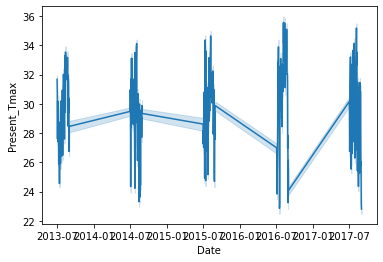

In [15]:
sns.lineplot(x ='Date',y='Present_Tmax',data=df)

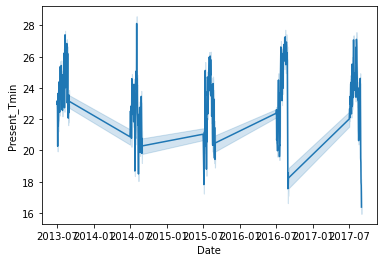

In [16]:
sns.lineplot(x ='Date',y='Present_Tmin',data=df)
plt.show()

#  As above the visiluation the year on year present min temp reducing

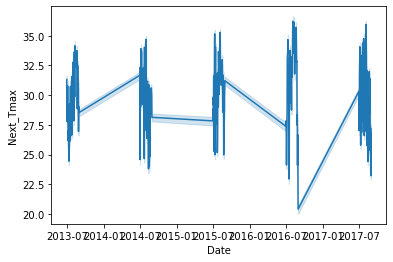

In [17]:
sns.lineplot(x ='Date',y='Next_Tmax',data=df)
plt.show()

#  As per the observation the maximum temparature year on year flatuate to much

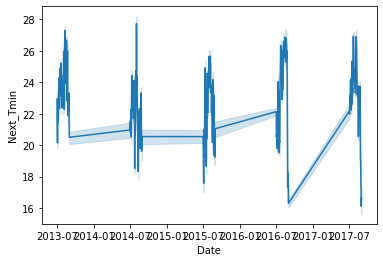

In [18]:

sns.lineplot(x ='Date',y='Next_Tmin',data=df)
plt.show()

# As per the observation the Minimum temparature year on year flatuate to much and year on year temp reducing 

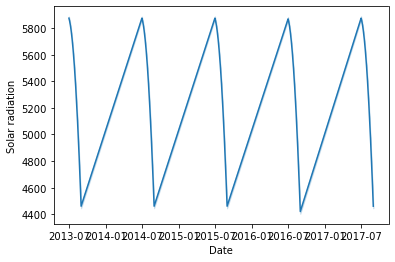

In [19]:
sns.lineplot(x ='Date',y='Solar radiation',data=df)
plt.show()

#  There is no growth in solar radiation every year same solar radiation

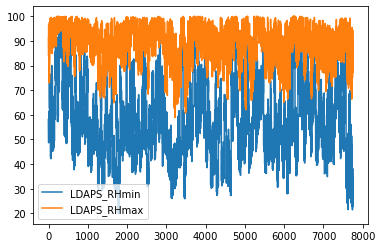

In [20]:
df[['LDAPS_RHmin','LDAPS_RHmax',]].plot()
plt.show()

#  Above the visiluation there is min hummidity and max hummidity in this dataset

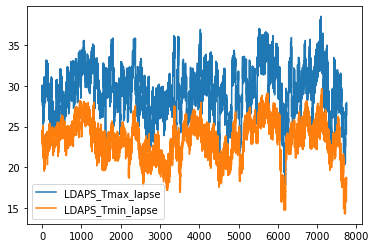

In [21]:
df[['LDAPS_Tmax_lapse','LDAPS_Tmin_lapse',]].plot()
plt.show()

# Above the visiluation there is minimum and maximum next-day air temparature

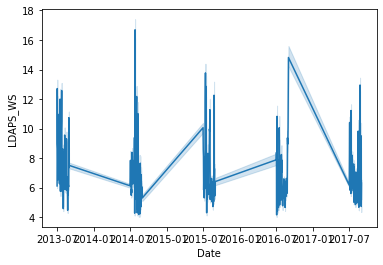

In [22]:
sns.lineplot(x ='Date',y='LDAPS_WS',data=df)
plt.show()

# Above the visiluation there is next-day average wind speed 

<Figure size 1080x720 with 0 Axes>

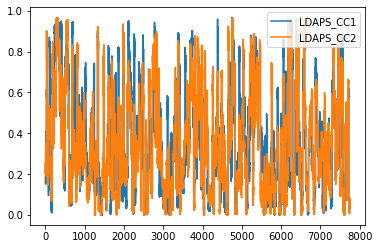

In [23]:
plt.figure(figsize=(15,10))
df[['LDAPS_CC1','LDAPS_CC2']].plot()
plt.show()

# Above the visiluation there is next-day  average cloud cover 0 to 12 hours

<Figure size 1080x720 with 0 Axes>

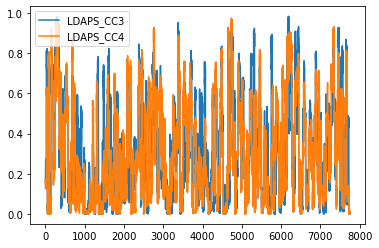

In [24]:
plt.figure(figsize=(15,10))
df[['LDAPS_CC3','LDAPS_CC4']].plot()
plt.show()

# Above the visiluation there is next-day average cloud cover 13 to 24 hours

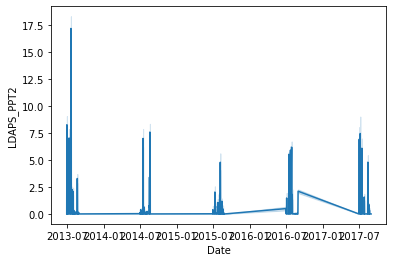

In [25]:
sns.lineplot(x ='Date',y='LDAPS_PPT2',data=df)
plt.show()

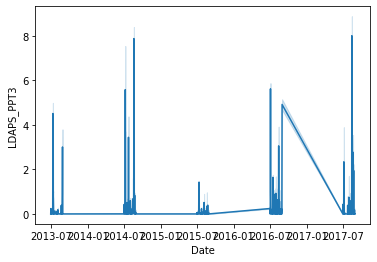

In [26]:
sns.lineplot(x ='Date',y='LDAPS_PPT3',data=df)
plt.show()

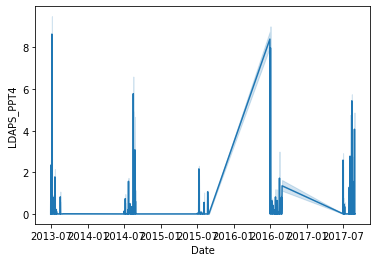

In [27]:
sns.lineplot(x ='Date',y='LDAPS_PPT4',data=df)
plt.show()

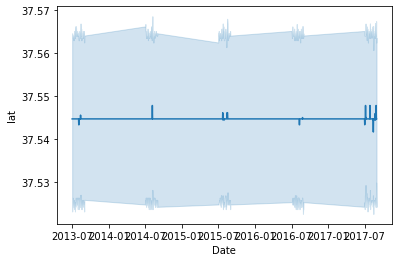

In [28]:
sns.lineplot(x ='Date',y='lat',data=df)
plt.show()

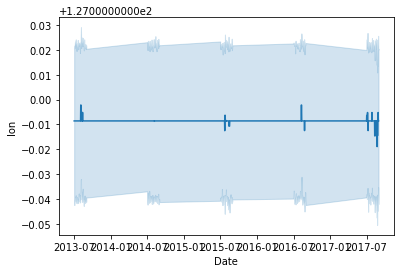

In [29]:
sns.lineplot(x ='Date',y='lon',data=df)
plt.show()

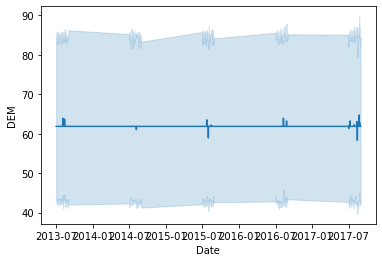

In [30]:
sns.lineplot(x ='Date',y='DEM',data=df)
plt.show()

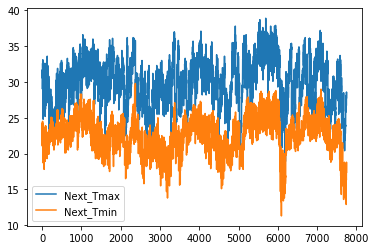

In [31]:
df[['Next_Tmax','Next_Tmin',]].plot()
plt.show()

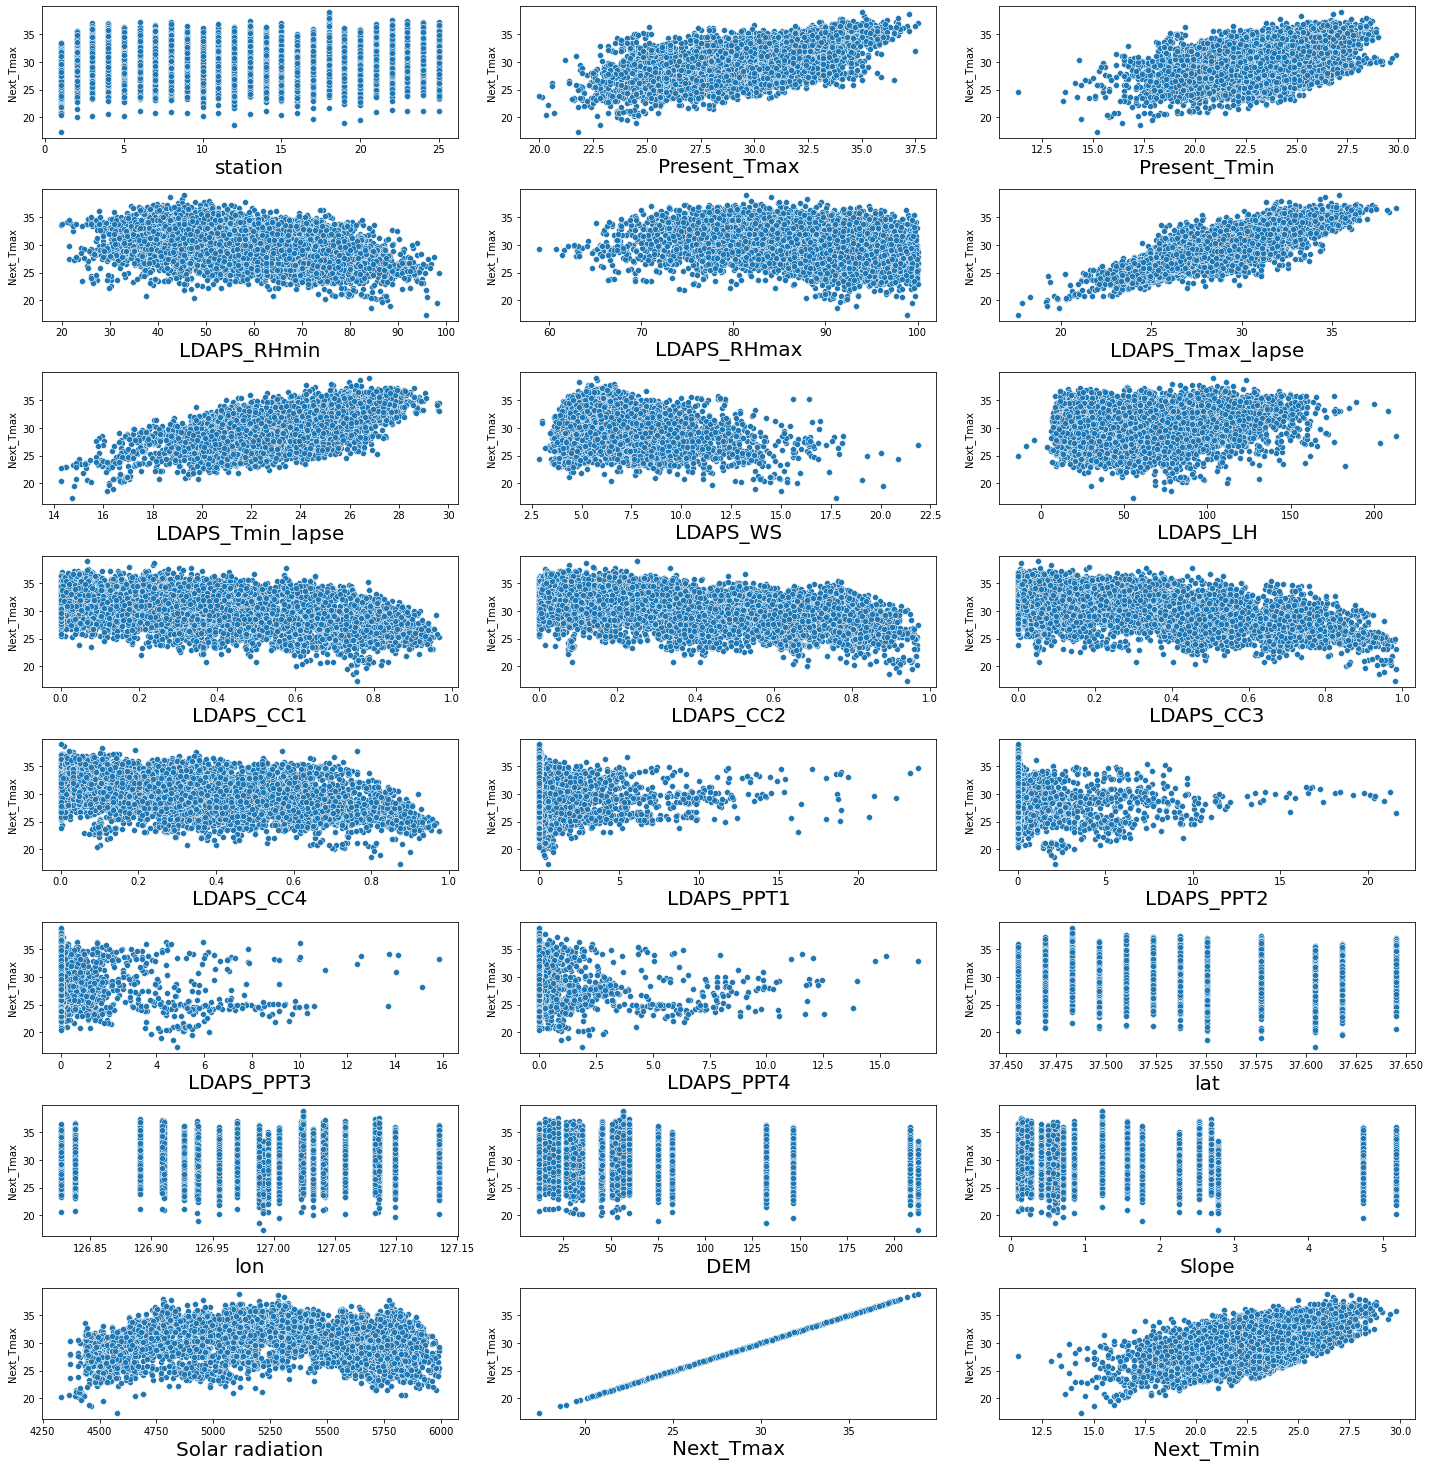

In [32]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in numerical_col:
    if plotnumber <= 30:
        plt.subplot(10, 3, plotnumber)
        sns.scatterplot(x=df[column],data=df,y=df['Next_Tmax'])
        plt.xlabel(column, fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()


#  Above the visiluation there is a strong relation with the features

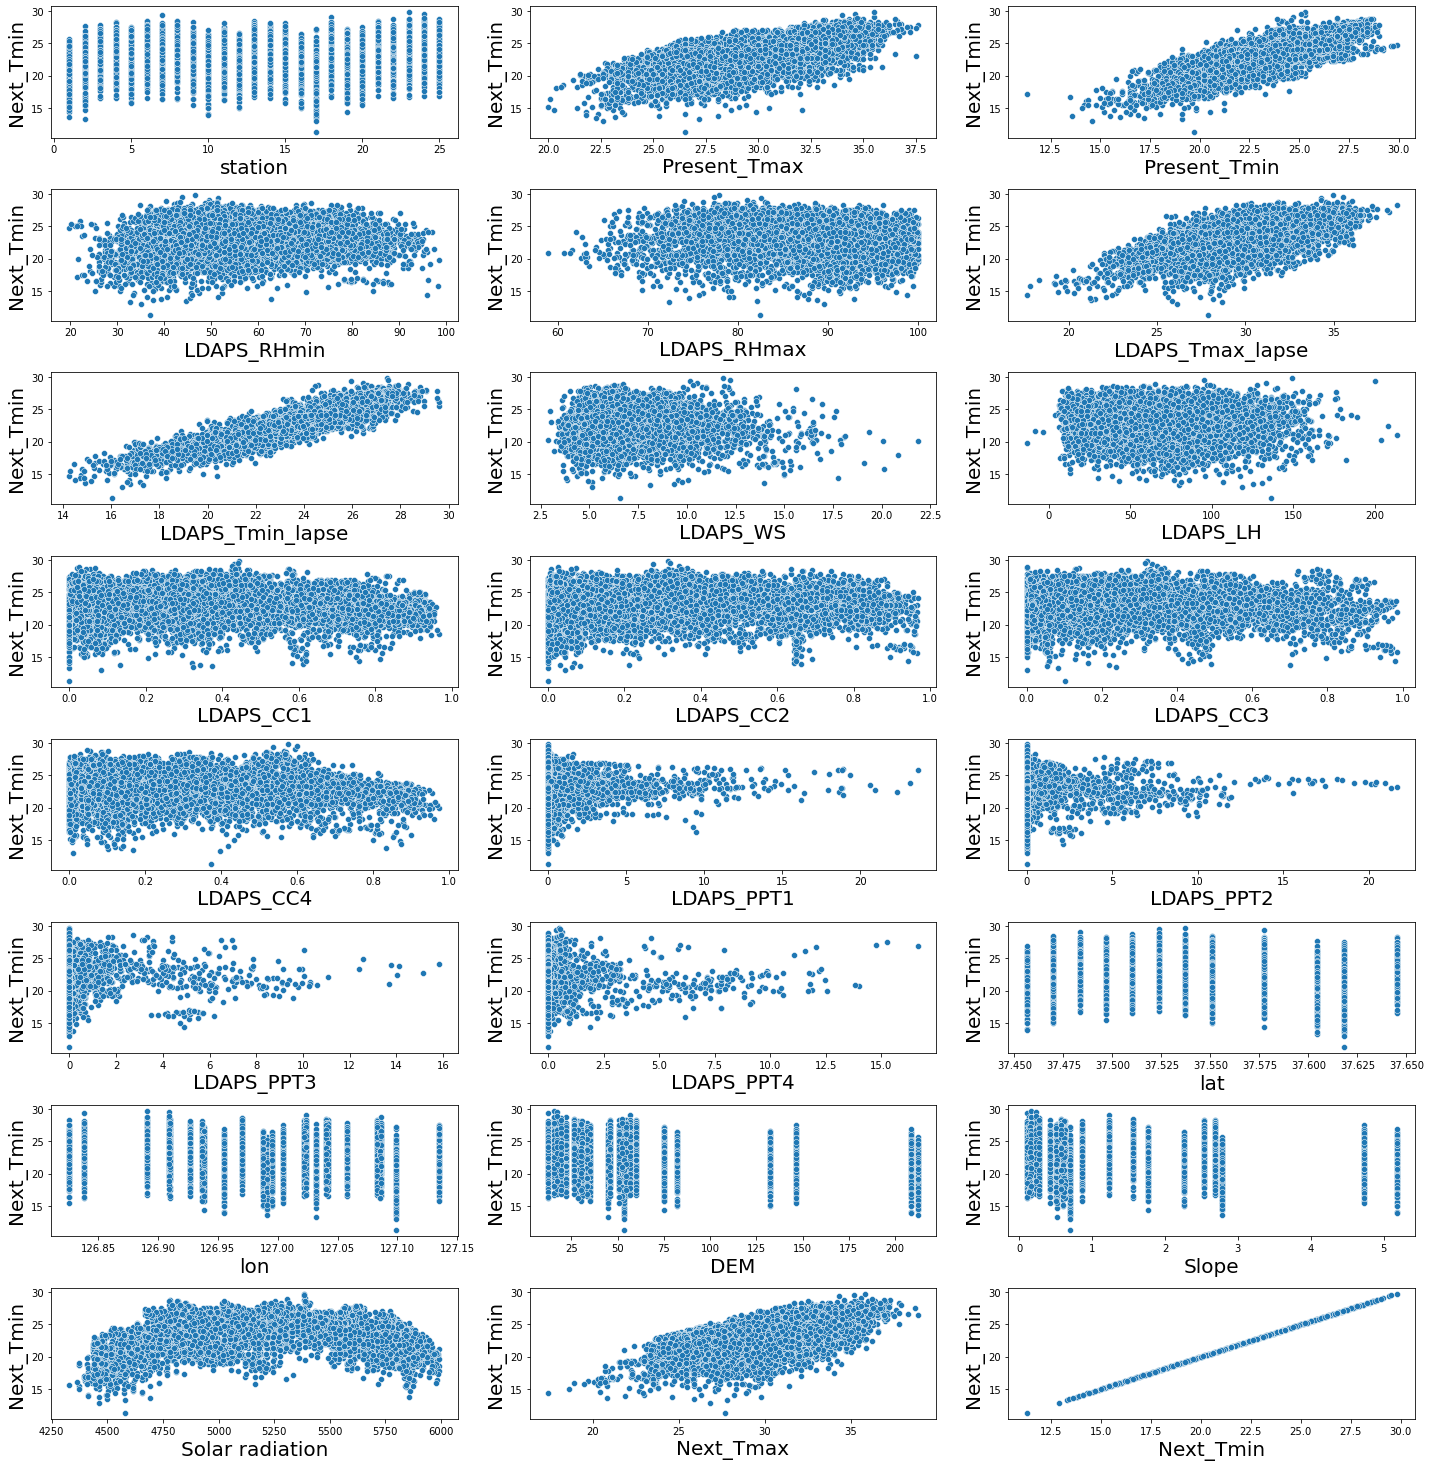

In [33]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in numerical_col:
    if plotnumber <= 30:
        plt.subplot(10, 3, plotnumber)
        sns.scatterplot(x=df[column],data=df,y=df['Next_Tmin'])
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Next_Tmin' ,fontsize=20)
     
    plotnumber += 1

plt.tight_layout()
plt.show()


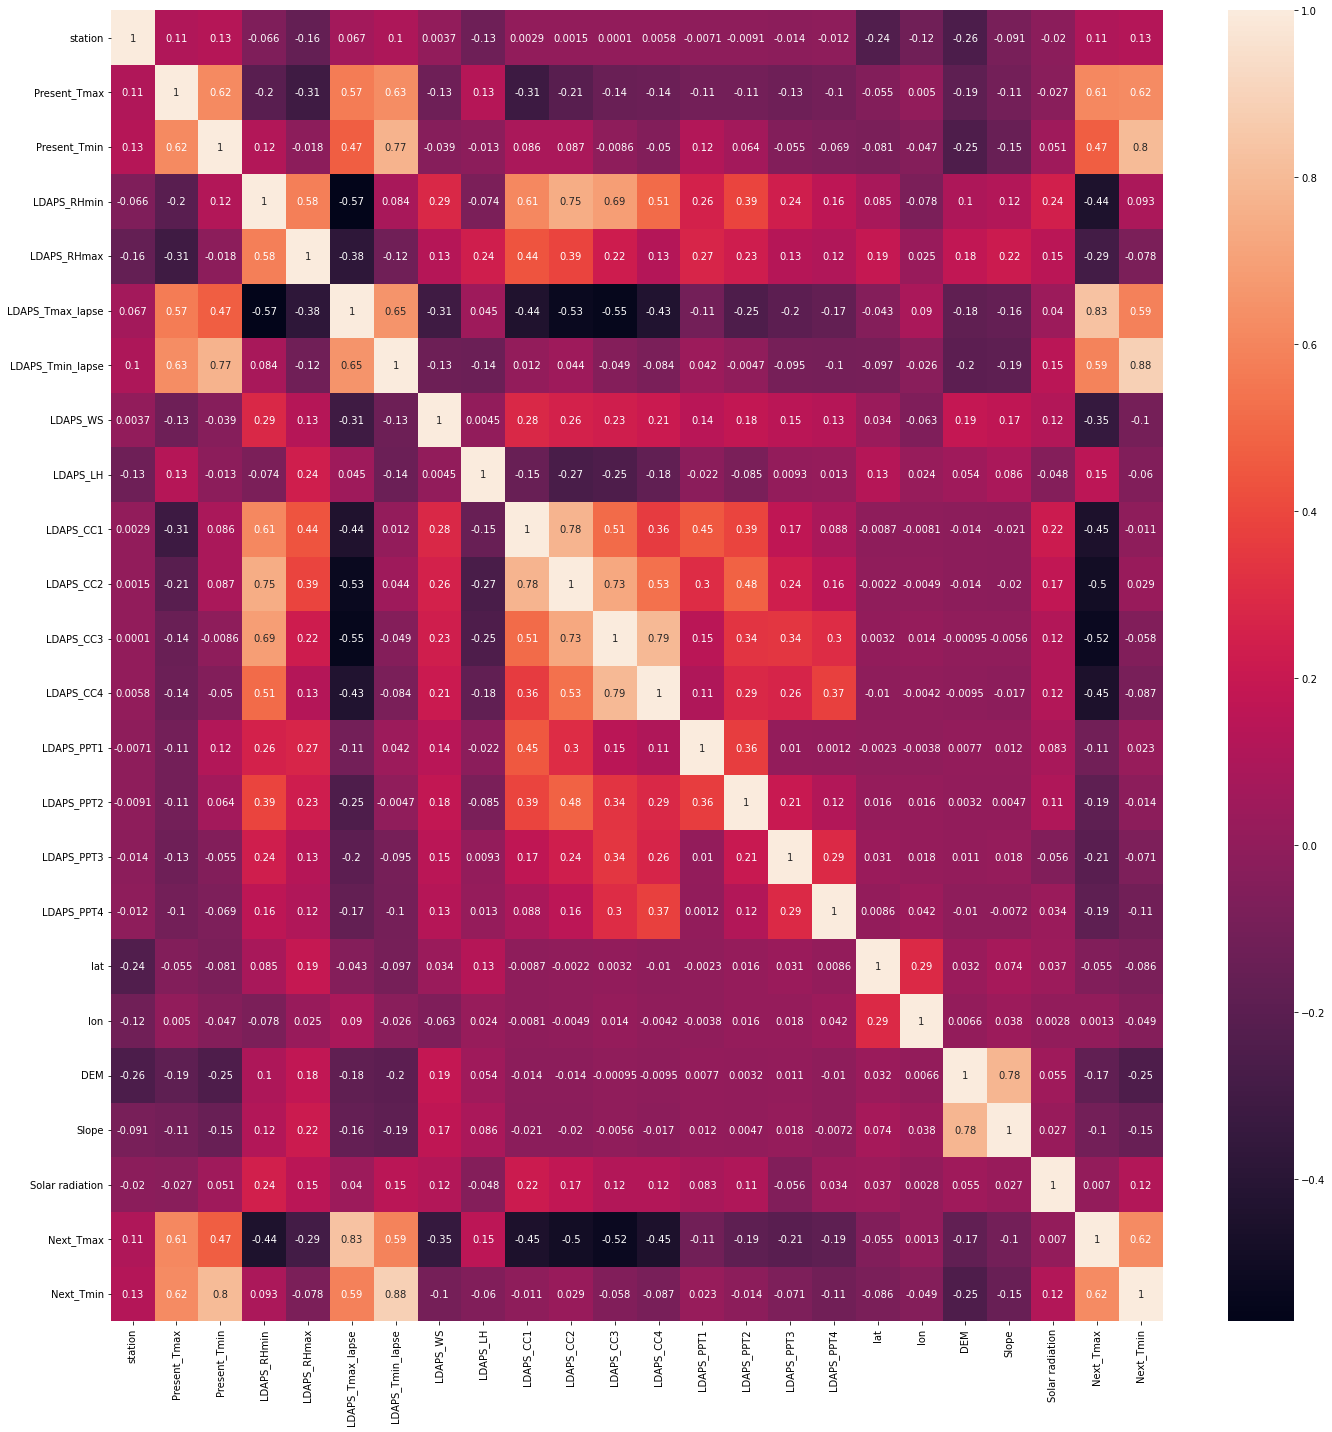

In [34]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.tight_layout()

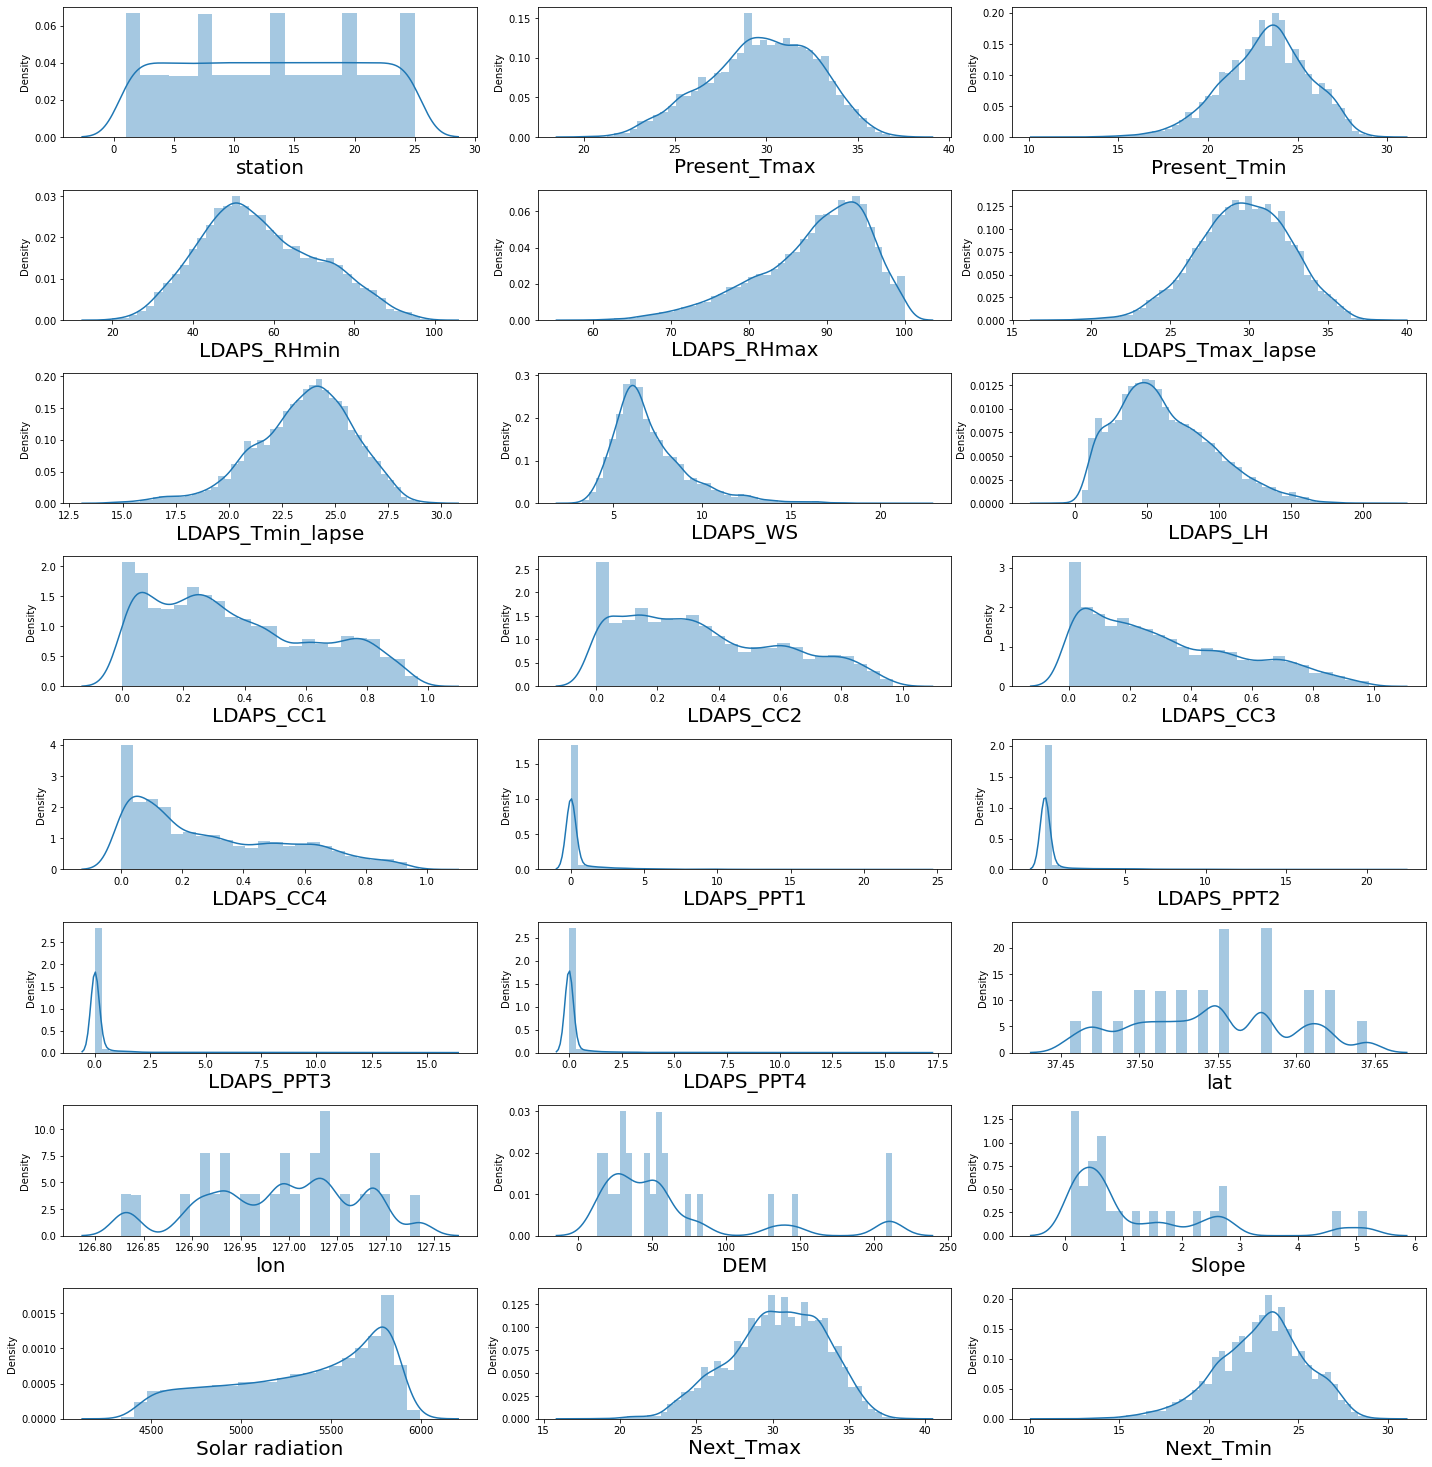

In [35]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in numerical_col:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
    
plt.tight_layout()

#  
Above the visiulation station, Present_Tmax, Present_Tmin, LDAPS_RHmin , LDAPS_Tmax_lapse,lat, lon Next_Tmax, Next_Tmin is closely looks like a normally distrubuted

LDAPS_RHmax, Solar radiation LDAPS_Tmin_lapse LDAPS_Tmin_lapse left skewness

LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2 , LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4 are right skewness




#  Let's check outliers

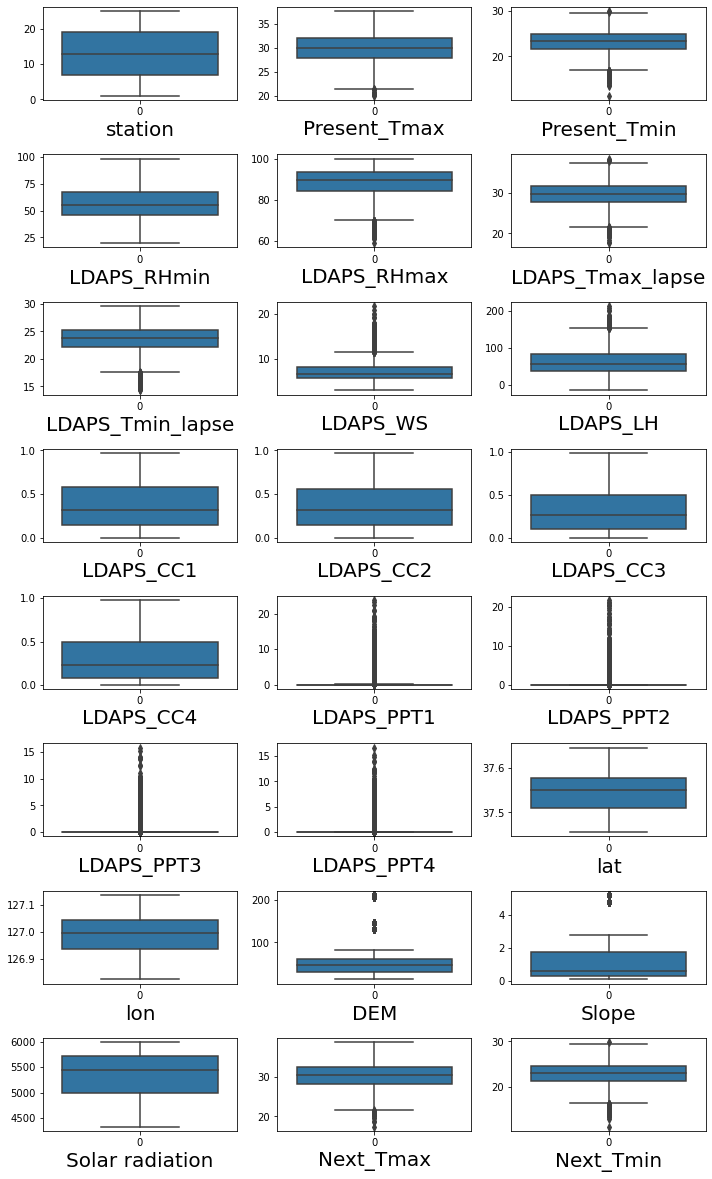

In [36]:
plt.figure(figsize=(10,20))
i=1
for column in numerical_col:
    if i<=30:
        
        
    
       ax= plt.subplot(10,3,i)
    
       sns.boxplot(data=df[column])
    
       plt.xlabel (column,fontsize=20)
        
    i+=1
    
plt.tight_layout()
    
                
                


#  
we found outliers in this column Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_Tmin_lapse, LDAPS_Tmin_lapse, 

LDAPS_WS,LDAPS_LH, LDAPS_PPT1,LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4

DEM, Slope, Next_Tmax, Next_Tmin  

In [37]:
x= df.drop(columns=['Next_Tmax', 'Next_Tmin'])
y=df[['Next_Tmax', 'Next_Tmin']]

In [38]:
from scipy.stats import zscore
features=df[['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_Tmin_lapse', 'LDAPS_Tmin_lapse', 
'LDAPS_WS','LDAPS_LH', 'LDAPS_PPT1','LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4',
'DEM', 'Slope']]
z=np.abs(zscore(features))
z.shape

(7723, 13)

In [39]:
np.where(z>3)

(array([  25,   25,   26, ..., 7717, 7717, 7717], dtype=int64),
 array([5, 8, 8, ..., 1, 3, 4], dtype=int64))

In [40]:
df1=df[(z<3).all(axis=1)]
print(df1.shape)
print(df.shape)

(6919, 25)
(7723, 25)


#  Data Loss

In [41]:
loss_percent = (7723-6906)/7723*100
loss_percent

10.578790625404636

In [42]:
df.skew()

station            -0.002773
Present_Tmax       -0.261957
Present_Tmin       -0.355459
LDAPS_RHmin         0.304173
LDAPS_RHmax        -0.843783
LDAPS_Tmax_lapse   -0.230021
LDAPS_Tmin_lapse   -0.585984
LDAPS_WS            1.556525
LDAPS_LH            0.667365
LDAPS_CC1           0.449140
LDAPS_CC2           0.474562
LDAPS_CC3           0.637694
LDAPS_CC4           0.662061
LDAPS_PPT1          5.128227
LDAPS_PPT2          5.720692
LDAPS_PPT3          6.381229
LDAPS_PPT4          6.753022
lat                 0.086467
lon                -0.286647
DEM                 1.721745
Slope               1.560876
Solar radiation    -0.513584
Next_Tmax          -0.335372
Next_Tmin          -0.396184
dtype: float64

# LDAPS_WS,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,
# Slope, LDAPS_RHmax has skewness we have to reduced

In [43]:
columns-df[['LDAPS_WS','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','LDAPS_RHmax']]

for column in columns:
    df[column] =np.cbrt(df[column])

In [44]:
df.skew()

station            -0.689046
Present_Tmax       -0.419239
Present_Tmin       -0.589649
LDAPS_RHmin        -0.078982
LDAPS_RHmax        -0.988154
LDAPS_Tmax_lapse   -0.431697
LDAPS_Tmin_lapse   -0.825472
LDAPS_WS            0.879791
LDAPS_LH           -0.345953
LDAPS_CC1          -0.717742
LDAPS_CC2          -0.755615
LDAPS_CC3          -0.583991
LDAPS_CC4          -0.461620
LDAPS_PPT1          1.910074
LDAPS_PPT2          2.262385
LDAPS_PPT3          2.579368
LDAPS_PPT4          2.861475
lat                 0.086467
lon                -0.286647
DEM                 1.721745
Slope               1.560876
Solar radiation    -0.513584
Next_Tmax          -0.335372
Next_Tmin          -0.396184
dtype: float64

#  we reduced skewness

In [45]:
df['Date'] = df['Date'].astype(np.int64) // 10**9

In [77]:
x= df.drop(columns=['Next_Tmax', 'Next_Tmin'])
y=df['Next_Tmax']
z=df['Next_Tmin']

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,-2.362461,-1.470627,-0.326253,-0.728997,0.188450,0.395861,-0.498428,-0.185835,-0.042758,0.376727,...,-0.344239,-0.565663,-0.510548,-0.484387,-0.428652,1.188219,-0.004705,2.769916,1.113817,1.516820
1,-1.867621,-1.470627,0.724639,-0.643314,-0.225057,0.327809,0.106150,0.241512,-0.657826,-0.127236,...,-0.361805,-0.565663,-0.510548,-0.484387,-0.428652,1.188219,0.512235,-0.315833,-0.543011,1.228776
2,-1.520502,-1.470627,0.629190,0.064490,-0.486866,-0.578312,0.186167,0.457325,-0.405294,-1.443189,...,-0.284956,-0.565663,-0.510548,-0.484387,-0.428652,0.652150,0.840050,-0.526781,-0.723950,1.215358
3,-1.244162,-1.470627,0.756322,0.105038,0.187391,1.094862,0.057366,-0.051794,-0.682166,0.277344,...,-0.326318,-0.565663,-0.510548,-0.484387,-0.428652,1.990336,0.386152,-0.298273,0.931274,1.199997
4,-1.010803,-1.470627,0.565221,-0.515774,0.048166,0.267798,-0.141577,0.015052,-0.632868,1.241529,...,-0.149707,-0.565663,-0.510548,-0.484387,-0.428652,0.118067,1.810888,-0.494902,-0.549286,1.206027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,0.986192,1.474772,-2.371493,-2.372001,-2.707410,-1.397939,-0.589519,-2.323047,-0.154889,-2.258251,...,-1.793217,-0.565663,-0.510548,-0.484387,-0.428652,0.118067,0.613101,-0.655844,-0.500695,-2.065260
7719,1.068275,1.474772,-2.609554,-2.567835,-2.111071,-0.618108,-0.982014,-2.565449,-0.613804,0.690899,...,-1.385318,-0.565663,-0.510548,-0.484387,-0.428652,-0.686036,1.193082,-0.735600,-0.820913,-2.098405
7720,1.147907,1.474772,-2.293057,-2.716689,-2.471632,-1.308771,-1.109295,-2.092801,-0.399396,0.444179,...,-2.482052,-0.565663,-0.510548,-0.484387,-0.428652,-0.149967,-1.265534,-0.853069,-0.804716,-2.094885
7721,1.225263,1.474772,-2.293057,-2.420682,-2.784603,-1.540516,-0.872782,-2.113180,-0.186752,-0.281310,...,-2.482052,-0.565663,-0.510548,-0.484387,-0.428652,-0.418002,-1.038585,-0.821617,-0.755906,-2.106400


In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x, i) for i in range(x.shape[1])]
vif ['features'] =x.columns 
vif

,vif,features
0,1.366142,station
1,1.117982,Date
2,2.746167,Present_Tmax
3,3.186726,Present_Tmin
4,6.200409,LDAPS_RHmin
5,2.298881,LDAPS_RHmax
6,7.646009,LDAPS_Tmax_lapse
7,8.046687,LDAPS_Tmin_lapse
8,1.311320,LDAPS_WS
9,1.472810,LDAPS_LH


#  LDAPS_Tmin_lapse vif score is greter than 5 so we drop this column


In [49]:
x.drop(['LDAPS_Tmin_lapse'],axis=1,inplace=True)

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x, i) for i in range(x.shape[1])]
vif ['features'] =x.columns 
vif

,vif,features
0,1.365613,station
1,1.112940,Date
2,2.446211,Present_Tmax
3,2.770821,Present_Tmin
4,4.191711,LDAPS_RHmin
5,2.276889,LDAPS_RHmax
6,3.390599,LDAPS_Tmax_lapse
7,1.311094,LDAPS_WS
8,1.371373,LDAPS_LH
9,4.063995,LDAPS_CC1


#  Preprocessing done now we build a model

In [51]:
# import libraryies
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [52]:
maxAccu = 0
maxRs = 0

for i in range(1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    acc = r2_score(y_test, y_pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i

print('Best accuracy is', maxAccu, 'at random_state', maxRs)


Best accuracy is 0.7903076952050236 at random_state 310


In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRs)

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [55]:
LR= LinearRegression()
LR.fit(x_train,y_train)
pred_LR= LR.predict(x_test)
pred_train= LR.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_LR) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_LR))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_LR))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_LR)))

R2_score :  0.7903076952050236
R2_score on training data:  76.20419681097633
MEAN ABSOLUTE ERROR : 1.0969199213163952
MEAN SQUARED ERROR : 2.09412501606261
ROOT MEAN SQUARED ERROR : 1.4471091928609292


In [56]:
GB= GradientBoostingRegressor()
GB.fit(x_train,y_train)
pred_GB= GB.predict(x_test)
pred_train= GB.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_GB) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_GB))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_GB))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_GB)))

R2_score :  0.8767356631945188
R2_score on training data:  88.39133427093635
MEAN ABSOLUTE ERROR : 0.8584263747204832
MEAN SQUARED ERROR : 1.230998588837626
ROOT MEAN SQUARED ERROR : 1.1095037579195601


In [57]:
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR= RFR.predict(x_test)
pred_train= RFR.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_RFR) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_RFR))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_RFR))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_RFR)))

R2_score :  0.9154924752157796
R2_score on training data:  98.69292170670656
MEAN ABSOLUTE ERROR : 0.6908653431160977
MEAN SQUARED ERROR : 0.843947620630124
ROOT MEAN SQUARED ERROR : 0.9186662182915643


In [58]:
DTR= DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR= DTR.predict(x_test)
pred_train= DTR.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_LR) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_LR))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_LR))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_LR)))

R2_score :  0.7903076952050236
R2_score on training data:  100.0
MEAN ABSOLUTE ERROR : 1.0969199213163952
MEAN SQUARED ERROR : 2.09412501606261
ROOT MEAN SQUARED ERROR : 1.4471091928609292


In [59]:
knn= KNN()
knn.fit(x_train,y_train)
pred_knn= knn.predict(x_test)
pred_train= knn.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_knn) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_knn))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_knn))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_knn)))

R2_score :  0.8557905000713862
R2_score on training data:  90.17787801013093
MEAN ABSOLUTE ERROR : 0.8834958998705223
MEAN SQUARED ERROR : 1.4401707380233064
ROOT MEAN SQUARED ERROR : 1.2000711387344112


In [60]:
LA= Lasso()
LA.fit(x_train,y_train)
pred_LA= LA.predict(x_test)
pred_train= LA.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_LA) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_LA))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_LA))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_LA)))

R2_score :  0.6022316459604269
R2_score on training data:  57.93538466870509
MEAN ABSOLUTE ERROR : 1.5932252168240508
MEAN SQUARED ERROR : 3.972375913397251
ROOT MEAN SQUARED ERROR : 1.9930820137157554


In [61]:
RI= Ridge()
RI.fit(x_train,y_train)
pred_RI= RI.predict(x_test)
pred_train= knn.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_RI) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_RI))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_RI))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_RI)))

R2_score :  0.79030641357732
R2_score on training data:  90.17787801013093
MEAN ABSOLUTE ERROR : 1.0969150718547365
MEAN SQUARED ERROR : 2.094137815238231
ROOT MEAN SQUARED ERROR : 1.4471136151796207


#  CROSS VALIDATION SCORE

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
print('LinearRegression ')
print('\n')
score=cross_val_score(LR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', (r2_score(y_test,pred_LR)- score.mean()))

LinearRegression 


[0.672123   0.65316828 0.6976478  0.80506187 0.57431704]
0.680463595926452
Difference between Accuracy score  and cross validation score is -  0.10984409927857164


In [64]:
print('GradientBoostingRegressor ')
print('\n')
score=cross_val_score(GB, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_GB)- score.mean())

GradientBoostingRegressor 


[0.74730441 0.69410862 0.66835895 0.8233154  0.60231145]
0.7070797660210555
Difference between Accuracy score  and cross validation score is -  0.1696558971734633


In [65]:
print('RandomForestRegressor ')
print('\n')
score=cross_val_score(RFR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_RFR)- score.mean())

RandomForestRegressor 


[0.70434741 0.66443215 0.65445885 0.79863812 0.3908888 ]
0.6425530693325808
Difference between Accuracy score  and cross validation score is -  0.27293940588319876


In [66]:
print('DecisionTreeRegressor ')
print('\n')
score=cross_val_score(DTR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_DTR)- score.mean())

DecisionTreeRegressor 


[ 0.32299664  0.4355782   0.35636533  0.63276129 -0.09406358]
0.3307275759601895
Difference between Accuracy score  and cross validation score is -  0.4734867922570139


In [67]:
print('KNN ')
print('\n')
score=cross_val_score(knn, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_knn)- score.mean())

KNN 


[0.54117733 0.31591201 0.42844244 0.60439597 0.47594945]
0.4731754388206041
Difference between Accuracy score  and cross validation score is -  0.38261506125078215


In [68]:
print('Lasso ')
print('\n')
score=cross_val_score(LA, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_LA)- score.mean())

Lasso 


[0.5319995  0.53351454 0.5756785  0.52113283 0.5989344 ]
0.5522519523975256
Difference between Accuracy score  and cross validation score is -  0.04997969356290133


In [69]:
print('Ridge ')
print('\n')
score=cross_val_score(RI, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_RI)- score.mean())

Ridge 


[0.67226119 0.6530872  0.69763286 0.80510336 0.57447333]
0.6805115882874377
Difference between Accuracy score  and cross validation score is -  0.10979482528988227


In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
}

gdsv = GridSearchCV(RandomForestRegressor(), param_grid, cv=3)
gdsv.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'n_estimators': [100, 200, 300]})

In [74]:
gdsv.best_params_

{'max_depth': None, 'n_estimators': 300}

In [ ]:
x= df.drop(columns=['Next_Tmax', 'Next_Tmin'])
y=df[']
z=df['Next_Tmin']

# Next Day maximum temparature prediction

In [76]:
Final_model= RandomForestRegressor(max_depth= None,n_estimators = 300  )
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc= r2_score(y_test, pred)
print(acc*100)

91.82919449841879


In [78]:
maxAccu = 0
maxRs = 0

for i in range(1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, z, test_size=0.30, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    acc = r2_score(y_test, y_pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i

print('Best accuracy is', maxAccu, 'at random_state', maxRs)


Best accuracy is 0.8509574201021507 at random_state 410


In [91]:
LR= LinearRegression()
LR.fit(x_train,y_train)
pred_LR= LR.predict(x_test)
pred_train= LR.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_LR) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_LR))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_LR))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_LR)))

R2_score :  0.8381482599849976
R2_score on training data:  83.2664609867843
MEAN ABSOLUTE ERROR : 0.7852270870687051
MEAN SQUARED ERROR : 1.0012135186888773
ROOT MEAN SQUARED ERROR : 1.0006065753775943


In [92]:
GB= GradientBoostingRegressor()
GB.fit(x_train,y_train)
pred_GB= GB.predict(x_test)
pred_train= GB.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_GB) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_GB))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_GB))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_GB)))

R2_score :  0.8960835876015436
R2_score on training data:  90.8832154949224
MEAN ABSOLUTE ERROR : 0.6254955320059844
MEAN SQUARED ERROR : 0.6428260635155302
ROOT MEAN SQUARED ERROR : 0.8017643441283294


In [93]:
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR= RFR.predict(x_test)
pred_train= RFR.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_RFR) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_RFR))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_RFR))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_RFR)))

R2_score :  0.9088310904289116
R2_score on training data:  98.68169224657201
MEAN ABSOLUTE ERROR : 0.5756922744928787
MEAN SQUARED ERROR : 0.5639701169615883
ROOT MEAN SQUARED ERROR : 0.7509794384412853


In [94]:
knn= KNN()
knn.fit(x_train,y_train)
pred_knn= knn.predict(x_test)
pred_train= knn.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_knn) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_knn))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_knn))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_knn)))

R2_score :  0.8348106427176156
R2_score on training data:  89.05774128395745
MEAN ABSOLUTE ERROR : 0.7533362106171774
MEAN SQUARED ERROR : 1.0218599913681483
ROOT MEAN SQUARED ERROR : 1.0108709073705446


In [95]:
LA= Lasso()
LA.fit(x_train,y_train)
pred_LA= LA.predict(x_test)
pred_train= LA.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_LA) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_LA))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_LA))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_LA)))

R2_score :  0.08597249822269637
R2_score on training data:  7.759812777411801
MEAN ABSOLUTE ERROR : 1.8836895193365208
MEAN SQUARED ERROR : 5.654166530109792
ROOT MEAN SQUARED ERROR : 2.377849139476639


In [96]:
RI= Ridge()
RI.fit(x_train,y_train)
pred_RI= RI.predict(x_test)
pred_train= knn.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_RI) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_RI))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_RI))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_RI)))

R2_score :  0.8380696172914177
R2_score on training data:  89.05774128395745
MEAN ABSOLUTE ERROR : 0.7854518048963223
MEAN SQUARED ERROR : 1.0017000017378148
ROOT MEAN SQUARED ERROR : 1.0008496399249065


# CROSS VALIDATION SCORE

In [101]:
print('LinearRegression ')
print('\n')
score=cross_val_score(LR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', (r2_score(y_test,pred_LR)- score.mean()))

LinearRegression 


[0.67208177 0.64825677 0.69423017 0.80573198 0.57454313]
0.6789687620135898
Difference between Accuracy score  and cross validation score is -  0.15917949797140785


In [102]:
print('GradientBoostingRegressor ')
print('\n')
score=cross_val_score(GB, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_GB)- score.mean())

GradientBoostingRegressor 


[0.72756013 0.70148485 0.68714074 0.82607417 0.58261714]
0.7049754043227521
Difference between Accuracy score  and cross validation score is -  0.19110818327879153


In [103]:
print('RandomForestRegressor ')
print('\n')
score=cross_val_score(RFR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_RFR)- score.mean())

RandomForestRegressor 


[0.69232853 0.67486312 0.65720218 0.80500666 0.39640759]
0.6451616147924994
Difference between Accuracy score  and cross validation score is -  0.2636694756364122


In [104]:
print('DecisionTreeRegressor ')
print('\n')
score=cross_val_score(DTR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_DTR)- score.mean())

DecisionTreeRegressor 


[ 0.31919989  0.47275701  0.40479719  0.63559152 -0.16464107]
0.33354090670506314
Difference between Accuracy score  and cross validation score is -  -10.641716267786872


In [105]:
print('Lasso ')
print('\n')
score=cross_val_score(LA, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_LA)- score.mean())

Lasso 


[-0.1214673  -0.07551027  0.03154472 -0.09983403 -0.2310692 ]
-0.09926721444339937
Difference between Accuracy score  and cross validation score is -  0.18523971266609573


In [106]:
print('Ridge ')
print('\n')
score=cross_val_score(RI, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_RI)- score.mean())

Ridge 


[0.67988504 0.64010749 0.68977468 0.80806904 0.57969332]
0.6795059151583394
Difference between Accuracy score  and cross validation score is -  0.15856370213307835


#  RandomForestRegressor gives 90 percent accuracy and cross validation difference score is 2.6 

In [107]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
}

gdsv = GridSearchCV(RandomForestRegressor(), param_grid, cv=3)
gdsv.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'n_estimators': [100, 200, 300]})

In [108]:
gdsv.best_params_

{'max_depth': None, 'n_estimators': 300}

# Next Day Minimum temparature prediction

In [109]:
Mintemp_Final_model= RandomForestRegressor(max_depth= None,n_estimators = 300  )
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc= r2_score(y_test, pred)
print(acc*100)

91.04134681616677
